In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



from src.clustering import clustering
from src.utils import *

from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

sns.set()

Using TensorFlow backend.


# Iris

## Original

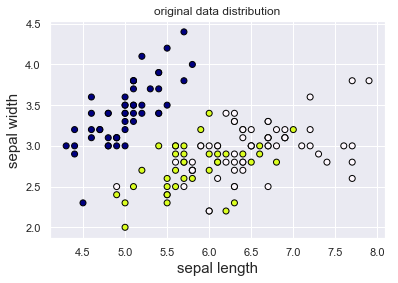

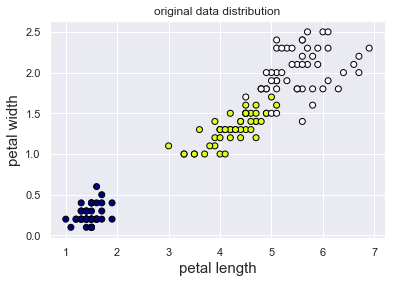

In [2]:
iris = load_iris_to_df()
plot_2d(iris, 'sepal_length', 'sepal_width', comment="org",title="original data distribution")
plot_2d(iris, 'petal_length', 'petal_width', comment="org",title="original data distribution")

## EM

(     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
5             5.4          3.9           1.7          0.4      0
6             4.6          3.4           1.4          0.3      0
7             5.0          3.4           1.5          0.2      0
8             4.4          2.9           1.4          0.2      0
9             4.9          3.1           1.5          0.1      0
10            5.4          3.7           1.5          0.2      0
11            4.8          3.4           1.6          0.2      0
12            4.8          3.0           1.4          0.1      0
13            4.3          3.0           1.1          0.1      0
14            5.8       

AttributeError: 'tuple' object has no attribute 'get'

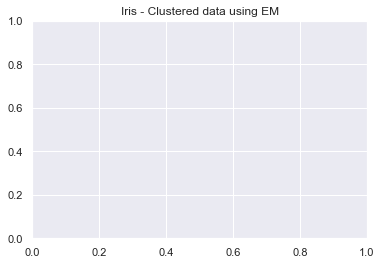

In [4]:
iris_data = iris.drop('label', 1)
iris_em = clustering(iris_data, 'EM', 3)
print(iris_em)
plot_2d(iris_em, 'sepal_length', 'sepal_width', comment="EM",title="Iris - Clustered data using EM")
plot_2d(iris_em, 'petal_length', 'petal_width', comment="EM",title="Iris - Clustered data using EM")

plt.figure()
plt.scatter(range(1,151),iris.get('label'),c=iris_em.get('label'))
plt.title("Iris - EM - Cluster vs. orginial label")
plt.xlabel("ID of element")
plt.ylabel("Initial label")
plt.savefig('graphs/EM_iris_compare.png')

plt.show()

## Kmeans

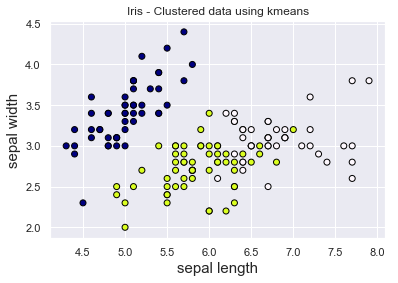

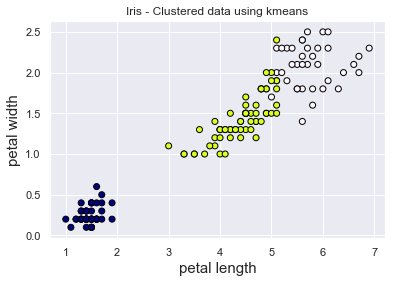

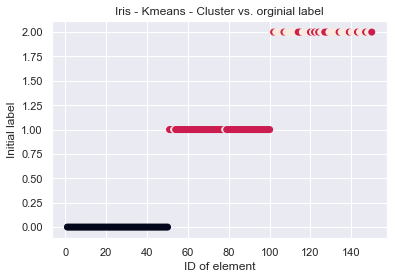

In [41]:
iris_data = iris.drop('label', 1)
iris_kmeans = clustering(iris_data, 'kmeans', 3)
plot_2d(iris_kmeans, 'sepal_length', 'sepal_width', comment="kmeans",title="Iris - Clustered data using kmeans")
plot_2d(iris_kmeans, 'petal_length', 'petal_width', comment="kmeans",title="Iris - Clustered data using kmeans")

plt.figure()
plt.scatter(range(1,151),iris.get('label'),c=iris_kmeans.get('label'))
plt.title("Iris - Kmeans - Cluster vs. orginial label")
plt.xlabel("ID of element")
plt.ylabel("Initial label")
plt.savefig('graphs/kmeans_iris_compare.png')
plt.show()

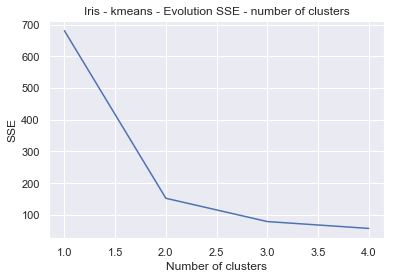

In [38]:
sse = {}
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, n_init=30, n_jobs=-1).fit(iris_data)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.title("Iris - kmeans - Evolution SSE - number of clusters")
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.savefig('graphs/iris_k.png')
plt.ylabel("SSE")
plt.show()

# Digits

In [19]:
letters = load_digits_to_df()
letters_data=letters.drop('label',1)
print (letters)

      0  1   2   3   4   5   6  7  8   9  ...    55  56  57  58  59  60  61  \
0     0  0   5  13   9   1   0  0  0   0  ...     0   0   0   6  13  10   0   
1     0  0   0  12  13   5   0  0  0   0  ...     0   0   0   0  11  16  10   
2     0  0   0   4  15  12   0  0  0   0  ...     0   0   0   0   3  11  16   
3     0  0   7  15  13   1   0  0  0   8  ...     0   0   0   7  13  13   9   
4     0  0   0   1  11   0   0  0  0   0  ...     0   0   0   0   2  16   4   
5     0  0  12  10   0   0   0  0  0   0  ...     0   0   0   9  16  16  10   
6     0  0   0  12  13   0   0  0  0   0  ...     0   0   0   1   9  15  11   
7     0  0   7   8  13  16  15  1  0   0  ...     0   0   0  13   5   0   0   
8     0  0   9  14   8   1   0  0  0   0  ...     0   0   0  11  16  15  11   
9     0  0  11  12   0   0   0  0  0   2  ...     0   0   0   9  12  13   3   
10    0  0   1   9  15  11   0  0  0   0  ...     0   0   0   1  10  13   3   
11    0  0   0   0  14  13   1  0  0   0  ...     0 

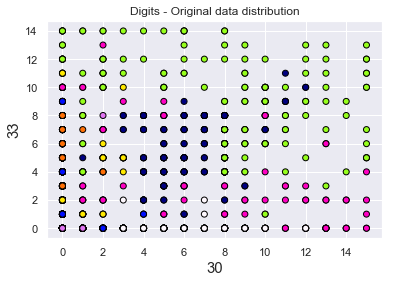

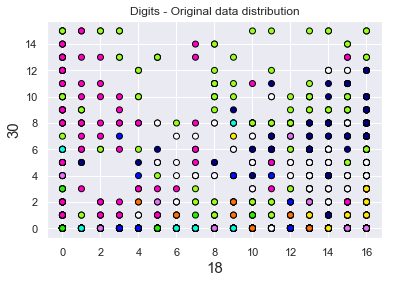

In [32]:
plot_2d(letters, '30', '33', comment="org",title="Digits - Original data distribution")
plot_2d(letters,'18','30',title="Digits - Original data distribution")


## K means

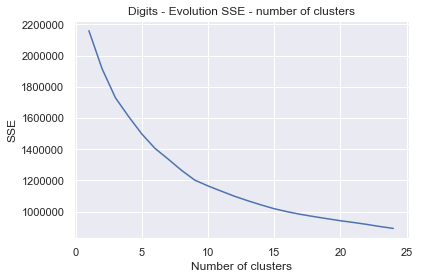

In [33]:
sse = {}
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, n_init=30, n_jobs=-1).fit(letters_data)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Digits - Evolution SSE - number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.savefig("graphs/kmeans_k_sse_letters.png")
plt.show()

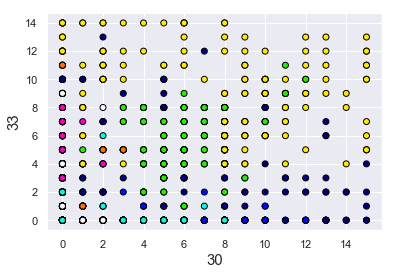

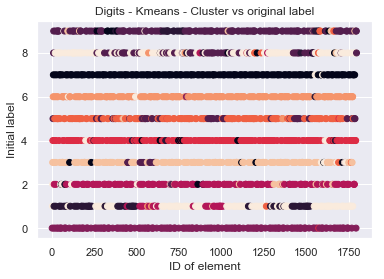

In [42]:
letters_kmeans = clustering(letters_data, 'kmeans', 10)
plot_2d(letters_kmeans, '30', '33', comment="kmeans")

plt.figure()
plt.title("Digits - Kmeans - Cluster vs original label")
plt.scatter(range(1,1798),letters.get('label'),c=letters_kmeans.get('label'))
plt.xlabel("ID of element")
plt.ylabel("Initial label")
plt.savefig('graphs/kmeans_digits_compare.png')

plt.show()

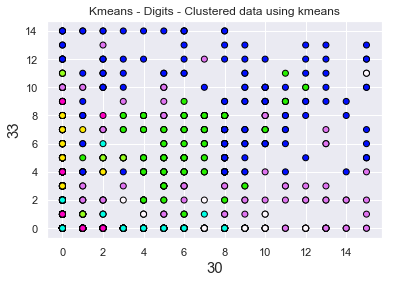

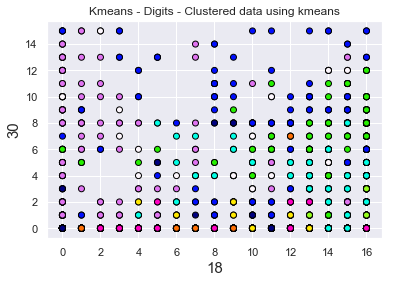

In [44]:
letters_kmeans = clustering(letters_data, 'kmeans', 10)
plot_2d(letters_kmeans, '30', '33', comment="kmeans",title="Kmeans - Digits - Clustered data using kmeans")
plot_2d(letters_kmeans, '18', '30', comment="kmeans",title="Kmeans - Digits - Clustered data using kmeans")


## EM

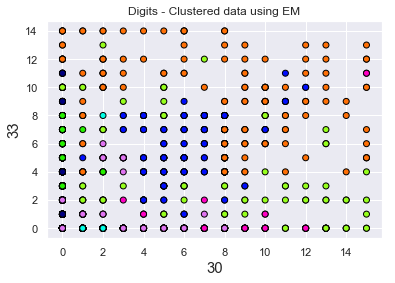

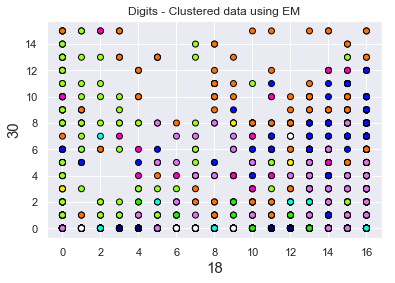

In [45]:
letters_em = clustering(letters_data, 'EM', 10)
plot_2d(letters_em, '30', '33', comment="EM",title="Digits - Clustered data using EM")
plot_2d(letters_em, '18', '30', comment="EM",title="Digits - Clustered data using EM")


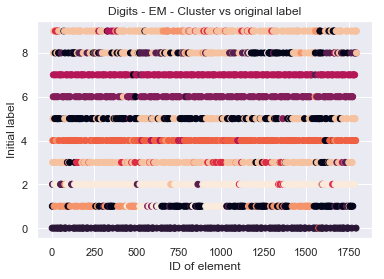

In [46]:
plt.figure()
plt.title("Digits - EM - Cluster vs original label")
plt.scatter(range(1,1798),letters.get('label'),c=letters_em.get('label'))
plt.xlabel("ID of element")
plt.ylabel("Initial label")
plt.savefig('graphs/EM_digits_compare.png')

plt.show()